Clustering Assignment Tasks
 Part A: K-Means Clustering Tasks
 1. Load and preprocess the dataset.
 2. Perform exploratory data analysis (EDA) with basic statistics and visualizations.
 3. Apply K-Means Clustering:
   - Use the Elbow method to determine the optimal number of clusters.
   - Fit the model and predict clusters.
   - Visualize the clusters using scatter plots.
 4. Evaluate clustering using metrics such as inertia, silhouette score, and cluster distribution

In [5]:
# Clustering Assignment Part A: K-Means Clustering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1️. Load and preprocess the dataset
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.info())
print(df.head())

print("\nMissing values:\n", df.isnull().sum())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)    


--- Basic Statistics ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


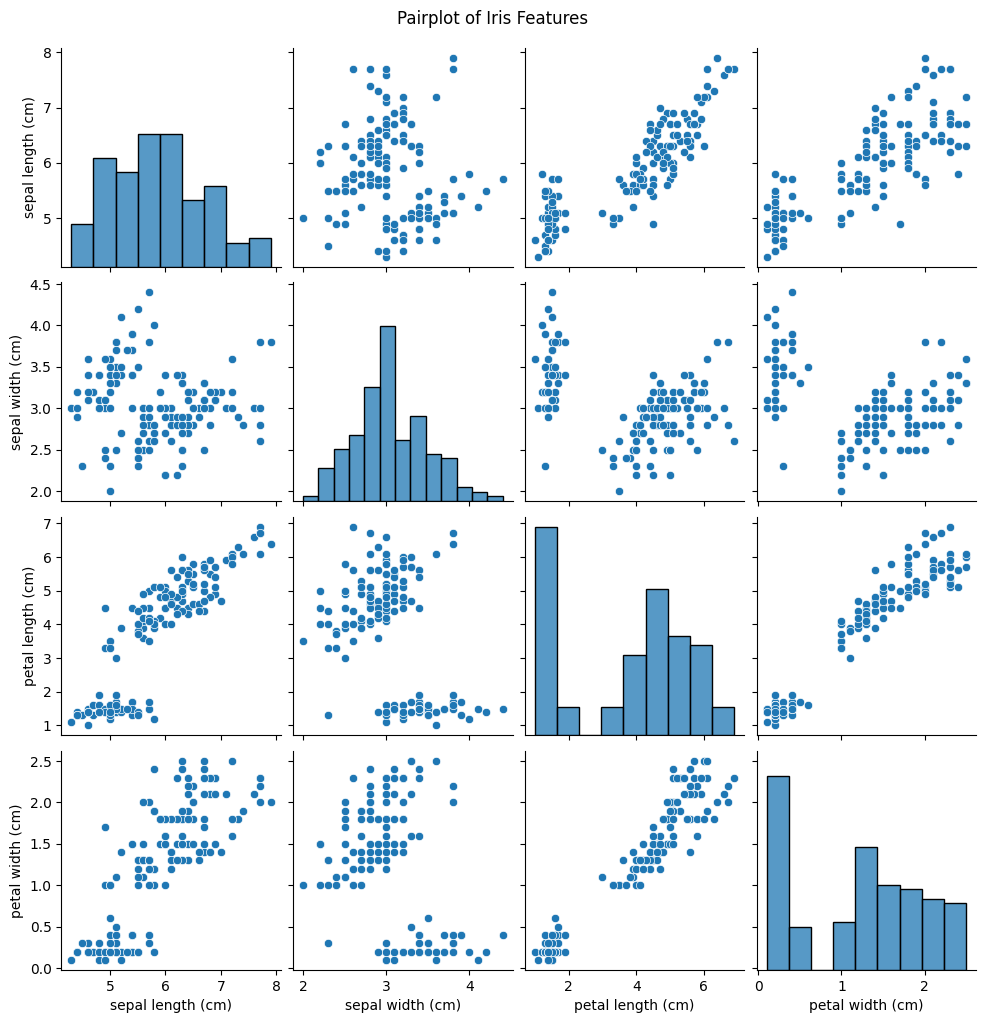

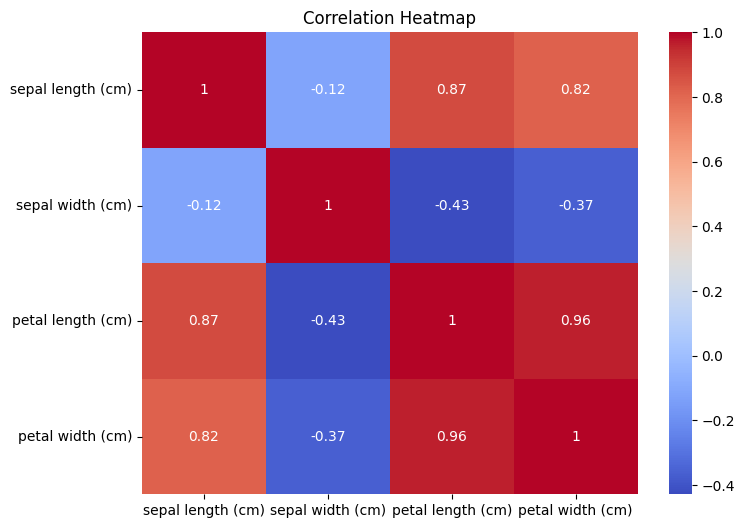

In [6]:
# 2️. Perform EDA
print("\n--- Basic Statistics ---")
print(df.describe())

sns.pairplot(df)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


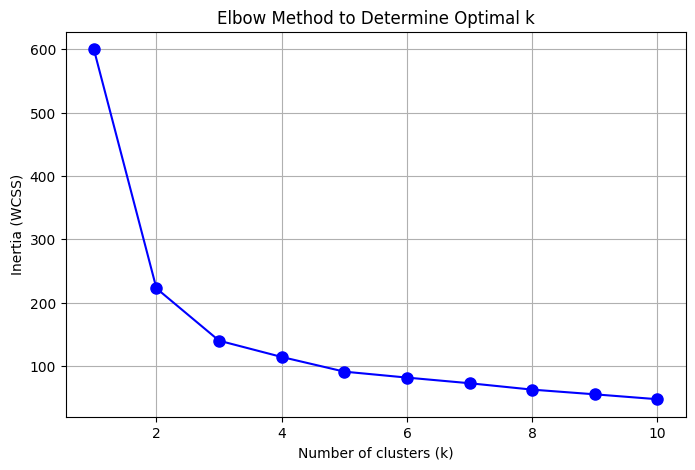

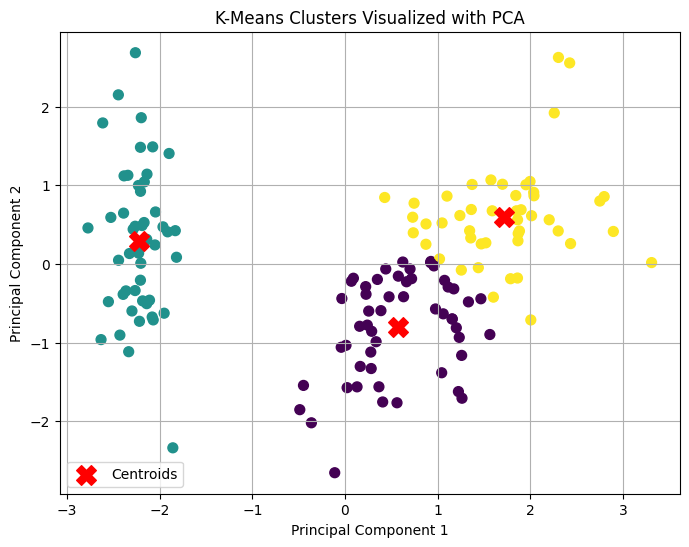

In [7]:
# 3️. Apply K-Means Clustering

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualized with PCA')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 4️. Evaluation

print("\nInertia (WCSS):", kmeans.inertia_)

sil_score = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", sil_score)

cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCluster Distribution:")
print(cluster_counts)

centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers_original, columns=df.columns[:-1])
print("\nCluster Centers (Original Feature Space):")
print(centers_df)


Inertia (WCSS): 139.82049635974982
Silhouette Score: 0.45994823920518635

Cluster Distribution:
Cluster
0    53
1    50
2    47
Name: count, dtype: int64

Cluster Centers (Original Feature Space):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.801887          2.673585           4.369811          1.413208
1           5.006000          3.428000           1.462000          0.246000
2           6.780851          3.095745           5.510638          1.972340
